#### MP2 - Solution: Image Classification using ImageLoader Class ####


In [1]:
# Import Libraries
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary

import numpy as np
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt
import os

In [2]:
torch.manual_seed(42)

In [3]:
# Image directory
img_path_train = './heritage/train/'
img_path_test = './heritage/test/'

In [4]:
# Check directory and files are correctly routed 

for root,_,file in os.walk(img_path_train):
    print(f"Directories: {root}\n Length: {len(file)}")

for root,_,file in os.walk(img_path_test):
    print(f"Directories: {root}\n Length: {len(file)}")

# Load some images for displaying from each directory
files = []

while len(files) < 6:
    for root,_,file in os.walk(img_path_train):
        if len(file) != 0:
            files.append(root +'/' + file[0])
        
print(files)    

Directories: ./heritage/train/
 Length: 0
Directories: ./heritage/train/altar
 Length: 828
Directories: ./heritage/train/apse
 Length: 505
Directories: ./heritage/train/bell_tower
 Length: 1057
Directories: ./heritage/train/column
 Length: 1914
Directories: ./heritage/train/dome(inner)
 Length: 589
Directories: ./heritage/train/dome(outer)
 Length: 1175
Directories: ./heritage/train/flying_buttress
 Length: 405
Directories: ./heritage/train/gargoyle
 Length: 1562
Directories: ./heritage/train/stained_glass
 Length: 998
Directories: ./heritage/train/vault
 Length: 1097
Directories: ./heritage/test/
 Length: 0
Directories: ./heritage/test/altar
 Length: 140
Directories: ./heritage/test/apse
 Length: 50
Directories: ./heritage/test/bell_tower
 Length: 170
Directories: ./heritage/test/column
 Length: 210
Directories: ./heritage/test/dome(inner)
 Length: 69
Directories: ./heritage/test/dome(outer)
 Length: 142
Directories: ./heritage/test/flying_buttress
 Length: 70
Directories: ./heritage/

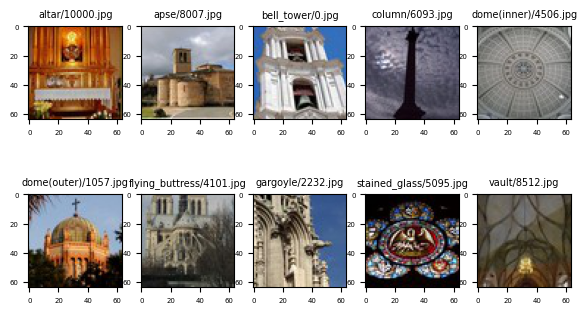

In [5]:
# # Display some images
# Use subplots

# using the variable ax for single a Axes
fig, ax = plt.subplots(nrows=2,ncols=int(len(files)/2),figsize=(7,4))
# plt.figure(figsize=(4,4))


x1 = 0
x2 = 0

for img in files:
    l = img[17:]
    i = plt.imread( img)
 
    ax[x1][x2].imshow(i)
    ax[x1][x2].tick_params(axis='both', labelsize=5)
    ax[x1][x2].set_title(l,fontsize=7)
    x2 = x2+1
    if x2 > 4:
        x2 = 0
        x1 = 1
plt.show()



In [6]:
# Specify transforms using torchvision.transforms as transforms
transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4390, 0.4216, 0.4020], std=[0.2130, 0.2131, 0.2275])
])

test_transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4390, 0.4216, 0.4020], std=[0.2130, 0.2131, 0.2275])
])

# One of the methods of normalizing the data from the world of statistics is (x - x.mean()) / x.std() (F-score)

In [7]:
# Load in each dataset and apply transformations using
# the torchvision.datasets as datasets library

train_set = datasets.ImageFolder(img_path_train, transform = transformations)
test_set = datasets.ImageFolder(img_path_test, transform = test_transformations)

# Print the classes in the train set and length of test set
print(f"Classes in data:\n{train_set.classes}\n\nLength of Test Set: {len(test_set)}")

Classes in data:
['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle', 'stained_glass', 'vault']

Length of Test Set: 1404


In [8]:
# Put into a Dataloader using torch library

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size =64,shuffle=False)

In [9]:
for l in range(2):
    img,lab = next(iter(train_loader))
    print(img.size(),lab.size())

torch.Size([64, 3, 64, 64]) torch.Size([64])
torch.Size([64, 3, 64, 64]) torch.Size([64])


In [10]:
class Exotic(nn.Module):
    def __init__(self):
        super(Exotic,self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3,padding=1)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3,padding=1)
        self.maxpool = nn.MaxPool2d(2)
        self.drop = nn.Dropout(0.2)
        self.relu = nn.ReLU()
        #self.fc1 = nn.Linear(128*14*14,1000)
        self.fc1 = nn.Linear(32*8*8,500)
        self.fc2 = nn.Linear(500,250)
        self.fc3 = nn.Linear(250,10)

    def forward(self,x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.drop(x)
        x = self.maxpool(self.relu(self.conv2(x)))
        x = self.maxpool(self.relu(self.conv3(x)))
        #x = self.maxpool(self.relu(self.conv4(x)))
        
        x = x.view(-1,32*8*8)
        
        x = self.fc1(x)
        X = self.relu(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        x = self.drop(x)
        x = self.fc3(x)
        x = self.relu(x)

        return(x)

        

In [18]:
# Instantiate model
model = Exotic()

# test all is good by running summary
summary(model,(3,64,64));

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 8, 64, 64]           224
├─ReLU: 1-2                              [-1, 8, 64, 64]           --
├─MaxPool2d: 1-3                         [-1, 8, 32, 32]           --
├─Dropout: 1-4                           [-1, 8, 32, 32]           --
├─Conv2d: 1-5                            [-1, 16, 32, 32]          1,168
├─ReLU: 1-6                              [-1, 16, 32, 32]          --
├─MaxPool2d: 1-7                         [-1, 16, 16, 16]          --
├─Conv2d: 1-8                            [-1, 32, 16, 16]          4,640
├─ReLU: 1-9                              [-1, 32, 16, 16]          --
├─MaxPool2d: 1-10                        [-1, 32, 8, 8]            --
├─Linear: 1-11                           [-1, 500]                 1,024,500
├─ReLU: 1-12                             [-1, 500]                 --
├─Linear: 1-13                           [-1, 250]                 125,

In [12]:
# Instantiate parameters

n_epoch = 30
lr = 0.001
optimizer = optim.Adam(model.parameters(),lr = lr)
loss_fn = nn.CrossEntropyLoss()                 

In [13]:
# Containers for storing data

train_correct = 0
train_samples = 0
test_correct = 0
test_samples = 0

train_losses = []
test_losses = []

In [14]:
# Train - Test loop

for epoch in range(n_epoch):
    model.train()
    for idx,data in enumerate(train_loader):
        X,y = data
        
        optimizer.zero_grad()
        y_pred = model(X)
        
        loss = loss_fn(y_pred.float(),y)

        _, predicted = torch.max(y_pred, 1)
        
        # Update the running total of correct predictions and samples
        train_correct += (predicted == y).sum().item()
        train_samples += y.size(0)
        
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        for data in test_loader:
            images,labels=data[0],data[1]
            
            outputs=model(images)
            
            test_loss= loss_fn(outputs.float(),labels)
            
            _, predicted = outputs.max(1)
            test_samples+= labels.size(0)
            test_correct += predicted.eq(labels).sum().item()
        
        
    # Display metrics
    train_losses.append(loss.item())
    test_losses.append(test_loss.item())
    train_accuracy = 100 * train_correct / train_samples
    test_accuracy = 100 * test_correct / test_samples
    print(f"Epoch:{epoch} Train Loss:{loss.item()} Accuracy: {train_accuracy:.2f}% Test Loss: {test_loss.item()} TestAccuracy: {test_accuracy:.2f}%")



Epoch:0 Train Loss:1.6297937631607056 Accuracy: 33.64% Test Loss: 2.4689249992370605 TestAccuracy: 39.46%
Epoch:1 Train Loss:1.1748570203781128 Accuracy: 40.42% Test Loss: 2.705501079559326 TestAccuracy: 46.87%
Epoch:2 Train Loss:1.7844834327697754 Accuracy: 45.55% Test Loss: 2.61687970161438 TestAccuracy: 49.41%
Epoch:3 Train Loss:1.2477877140045166 Accuracy: 49.00% Test Loss: 2.539700984954834 TestAccuracy: 50.84%
Epoch:4 Train Loss:1.5445235967636108 Accuracy: 51.36% Test Loss: 2.8571829795837402 TestAccuracy: 51.84%
Epoch:5 Train Loss:0.9267305731773376 Accuracy: 53.15% Test Loss: 2.645087480545044 TestAccuracy: 52.65%
Epoch:6 Train Loss:0.7147314548492432 Accuracy: 54.79% Test Loss: 2.7956628799438477 TestAccuracy: 53.56%
Epoch:7 Train Loss:0.9495407938957214 Accuracy: 56.27% Test Loss: 2.7524898052215576 TestAccuracy: 54.34%
Epoch:8 Train Loss:0.8312917947769165 Accuracy: 57.57% Test Loss: 2.5408246517181396 TestAccuracy: 54.71%
Epoch:9 Train Loss:1.6410833597183228 Accuracy: 58.

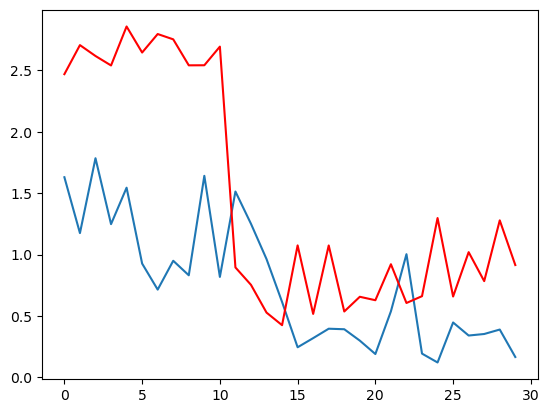

In [15]:
# Loss curve plotting

ep = [] # Store number of epochs
for i in range(n_epoch):
    ep.append(i)
    
plt.plot(ep,train_losses)
plt.plot(ep,test_losses,c='r')
plt.show()

In [17]:
# To Predict on new image create a dictionary of the classes
classes = {0:'altar', 1:'apse', 2:'bell_tower', 3:'column', 4:'dome(inner)', 5:'dome(outer)', 6:'flying_buttress', 7:'gargoyle', \
           8:'stained_glass', 9:'vault'}

# First create a transform
transformation_new = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4390, 0.4216, 0.4020], std=[0.2130, 0.2131, 0.2275])
])

# Images given for prediction
image_list = ['altar.jpg','Bell_Tower.jpg','dome_inner.jpg','dome_outer.jpg','stain_glass.jpg']

for i in image_list:
    
    # Read in the image - I am using the PiL library but tou can use skimage or any that works.
    img_new = Image.open(i)
    img_new = transformation_new(img_new)
    
    # Check shape of img
    print(f"Image Shape: {img_new.size()}")
    
    # Add a batch size (1 in this case) as the model expects that shape: batch,channels,size
    img_new = img_new.unsqueeze(0)
    print(f"\nRevised Image Shape: {img_new.size()}")
    
    # Predict using model by putting model in eval mode
    model.eval()
    with torch.no_grad():
        output = model(img_new)
    
    # Get the predicted class
    _, predicted_class = torch.max(output, 1)
    print(f'Predicted class: {classes[predicted_class.item()]}\nActual Class: {i}')



Image Shape: torch.Size([3, 64, 64])

Revised Image Shape: torch.Size([1, 3, 64, 64])
Predicted class: altar
Actual Class: altar.jpg
Image Shape: torch.Size([3, 64, 64])

Revised Image Shape: torch.Size([1, 3, 64, 64])
Predicted class: bell_tower
Actual Class: Bell_Tower.jpg
Image Shape: torch.Size([3, 64, 64])

Revised Image Shape: torch.Size([1, 3, 64, 64])
Predicted class: vault
Actual Class: dome_inner.jpg
Image Shape: torch.Size([3, 64, 64])

Revised Image Shape: torch.Size([1, 3, 64, 64])
Predicted class: dome(outer)
Actual Class: dome_outer.jpg
Image Shape: torch.Size([3, 64, 64])

Revised Image Shape: torch.Size([1, 3, 64, 64])
Predicted class: stained_glass
Actual Class: stain_glass.jpg
